### 1. 성경에서 가장 많이 나오는 단어 5개는?

In [1]:
f = open('개역개정판성경.txt','r')
df = f.readlines()
f.close()

In [17]:
#df

In [3]:
import re
def remove_non_word(text):
    """한글을 제외한 문자를 제거"""
    return re.sub(r'[^가-힣]+', ' ', text)

In [4]:
df[0][0]

'창'

In [5]:
ndf = []
for i in range(len(df)):
    df1 = df[i].replace(df[i][0],"")  ## 각 라인 맨 앞글자 공백으로 대체
    df2 = remove_non_word(df1)  ## 한글을 제외한 문자 제거
    ndf.append(df2)

In [18]:
#ndf

In [19]:
# 리스트 원소 join
content = ''.join(ndf)
#content

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 

In [9]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[2, 1, 2, ..., 1, 2, 1]], dtype=int64)

In [10]:
import pandas as pd
result = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat   ## 빈도
})

In [11]:
result.sort_values('freq', ascending=False).head(5)

,word,freq
9769,내가,5560
6385,그의,4082
20282,모든,3333
45484,이르되,2867
40786,여호와께서,2366


### 2. 성경 워드클라우드로 표현

In [12]:
from wordcloud import WordCloud

In [13]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [20]:
# dictionery 형태로 변경
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
#frequencies

In [15]:
wc.fit_words(frequencies)

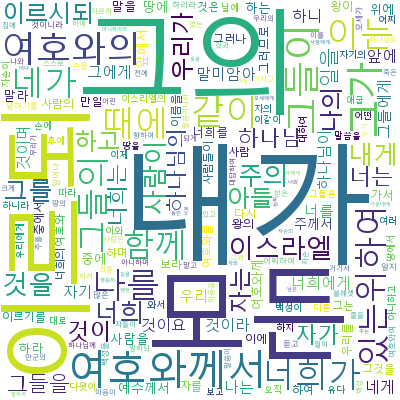

In [16]:
wc.to_image()